# Rough plan
- [ ] quick review of logistic regression
  - last lecture we saw a lot of "chunking" several different stances, lenses, frameworks, ways of making sense of concepts that humans use to communicate about data:
    - mathematics
    - visualization
    - programming
    - probability
    - statistics
    - machine learning
    - data
  - "code-switching" between them can be an effective skill to practice giving ourselves more context and opportunities to link our memory of concepts with related concepts. associating different stimuli to verbal events like "logistic regression" during learning can aid in recall and understanding.
  - rationale for being so prescriptive about what seems like a "simple" model (logistic regression)

from the may 8th lecture:

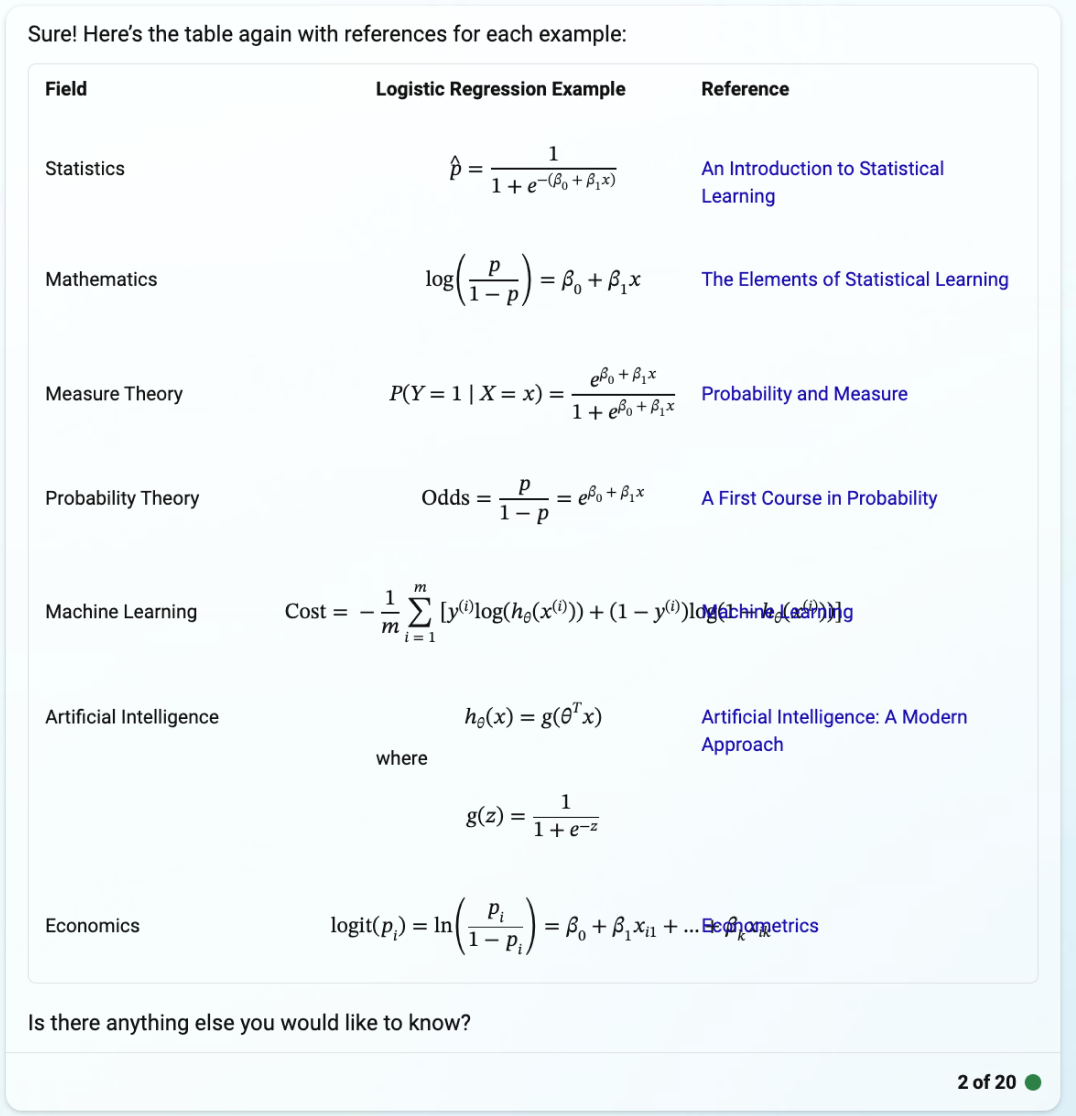
- [ ] logistic regression perspective on "embeddings"
- [ ] linear algebra perspective on "embeddings"
- [ ] visualizations of the above

## Code example from last class

Critique:
* who knows whether the below example is well-defined? 
* does `flags_mask` even refer to a message being spam or not? 
* what even is the "ground truth" here? maybe "spam" for one person is not spam for another person!
* it would take a long time to have everyone in the class annotate and agree upon all the chat messages and decide whether `flags_mask` actually corresponds to most people's idea of something being "spam" or not given the string representing the message on zulip. 
* this makes code-switching seem even more important, because moving between visualization, mathematics, ethnographic or sociological, machine learning lenses for understanding and communicating about the same problem can help move more quickly from data to a decision. 

In [1]:
import jax
import jax.numpy as np
from jax import random
from jax.scipy.special import expit as sigmoid
from jax import grad, jit, vmap
from jax import lax

import pandas as pd
import pyarrow.parquet as pq

# Read parquet file
df = pd.read_parquet('./data/datathinking.zulipchat.com/processed/zerver_usermessage.parquet')

# Ensure correct data types
df = df.astype({"user_profile": 'float32', "message": 'float32', "flags_mask": 'int32'})

# Define features and target
X = df[['user_profile', 'message']].values
y = df['flags_mask'].values

# Initialize parameters randomly
key = random.PRNGKey(0)
key, W_key, b_key = random.split(key, 3)
W = random.normal(W_key, (2,))
b = random.normal(b_key, ())

# Sigmoid function
def sigmoid(x):
    return 0.5 * (np.tanh(x / 2) + 1)

# Predict function
def predict(W, b, inputs):
    return sigmoid(np.dot(inputs, W) + b)

# Loss function
def loss(W, b, inputs, targets):
    preds = predict(W, b, inputs)
    label_probs = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probs))

# Compute gradient of loss function
grad_loss = jit(grad(loss, argnums=(0, 1)))

# Training loop
epochs = 10
learning_rate = 0.001
for i in range(epochs):
    dW, db = grad_loss(W, b, X, y)
    W -= learning_rate * dW
    b -= learning_rate * db

# Print final parameters
print("W:", W)
print("b:", b)


W: [nan nan]
b: nan


## Data Thinking principles we are using here

* starting with a prescriptive description of mathematics can be an efficient way to represent and communicate about a huge set of ways of describing a dataset and decisions that humans can make 
* at the same time as we take a prescriptive stance, keeping in mind the descriptive stance: there are many possible ways to describe the same model that humans _also_ use, that can be just as valid (or just as disputed!)
* creating rapid feedback loops for ourselves to condition behavior that is grounded in data and reality can help us understand concepts a little bit faster; visualization and different modalities of visual, written, programmatic communication and educational materials can serve to create more associations between the same concepts that can help recall and loosen any strongly-held prescriptive, inflexible stances or ways of learning
* if something is going slow or feels stuck, give up and try a different stance for understanding the same concept (visualize it, switch to programming, switch to data, etc)

## [5min] Try to visualize what is `linear` in the generalized "linear" models perspective on logistic regression

> Please create a visualization using altair of what exactly is "linear" using a common dataset for logistic regression: 

Sure, we can use the Iris dataset, which is a standard dataset often used in machine learning. This dataset contains measurements of 150 iris flowers from three different species. We'll simplify the problem a bit and only use two species and two features (sepal length and sepal width), which will be analogous to the x1 and x2 in your lecture note.

Here's a Python script that applies logistic regression to the Iris dataset using scikit-learn, keeping the variable names and symbols consistent with your lecture note:

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Create the design matrix X and the target vector y
# For simplicity, we'll only use two features (sepal length and sepal width)
# and two species (setosa and versicolor)
X = iris.data[:100, :2]
y = iris.target[:100]

# Fit the logistic regression model
model = LogisticRegression().fit(X, y)

# The model's coefficients correspond to β in your lecture note
β0 = model.intercept_[0]  # This is the intercept
β1, β2 = model.coef_[0]  # These are the coefficients for x1 and x2

# Now we can compute the probability that a flower is a versicolor (y=1)
# given its sepal length (x1) and sepal width (x2)
def predict_proba(x1, x2):
    η = β0 + β1 * x1 + β2 * x2  # This is the systematic component (linear predictor)
    μ = 1 / (1 + np.exp(-η))  # This is the expected value (probability of being versicolor)
    return μ

# Test the function with a sepal length of 5.0 and a sepal width of 3.5
print(predict_proba(5.0, 3.5))


0.07656927191829682


## Backing up: sorry i'm in confused. how is `μ` connected to `y`? i didn't use `y` in the lecture note, and you said that this code snippet keeps the variable naming consistent. am i missing something?

My apologies for the confusion. You're correct that μ wasn't directly mentioned in relation to y in the original lecture note. However, in the context of logistic regression, μ typically represents the expected value of the outcome variable y, given the predictors.

In this binary logistic regression setup, μ is the estimated probability of y being 1 (in the case of the iris dataset, y being 1 corresponds to the iris being of the species versicolor). This is because the logistic regression model we're discussing models the log-odds of y being 1 as a linear function of the predictors, and the inverse of this function, which is used to compute μ, gives the probability of y being 1.

So, in the provided Python script, predict_proba(x1, x2) is essentially computing μ for given values of x1 and x2.

Here's the relevant part of the Python code, explained with the connection between μ and y:

```python
# Now we can compute the probability that a flower is a versicolor (y=1)
# given its sepal length (x1) and sepal width (x2)
def predict_proba(x1, x2):
    η = β0 + β1 * x1 + β2 * x2  # This is the systematic component (linear predictor)
    μ = 1 / (1 + np.exp(-η))  # This is the expected value (probability of y being 1)
    return μ
```

In this context, the expected value (μ) is also the probability of y being 1, given x1 and x2. This function calculates η first, which is the systematic component of the model (essentially the weighted sum of the predictors). It then applies the inverse of the logit function to η to get μ, which in this case is the probability of y being 1, given the predictors x1 and x2.



## Before visualizing: what even _is_ the iris dataset? 

The Iris dataset is a standard dataset often used in machine learning. This dataset contains measurements of 150 iris flowers from three different species. We'll simplify the problem a bit and only use two species and two features (sepal length and sepal width), which will be analogous to the x1 and x2 in your lecture note.

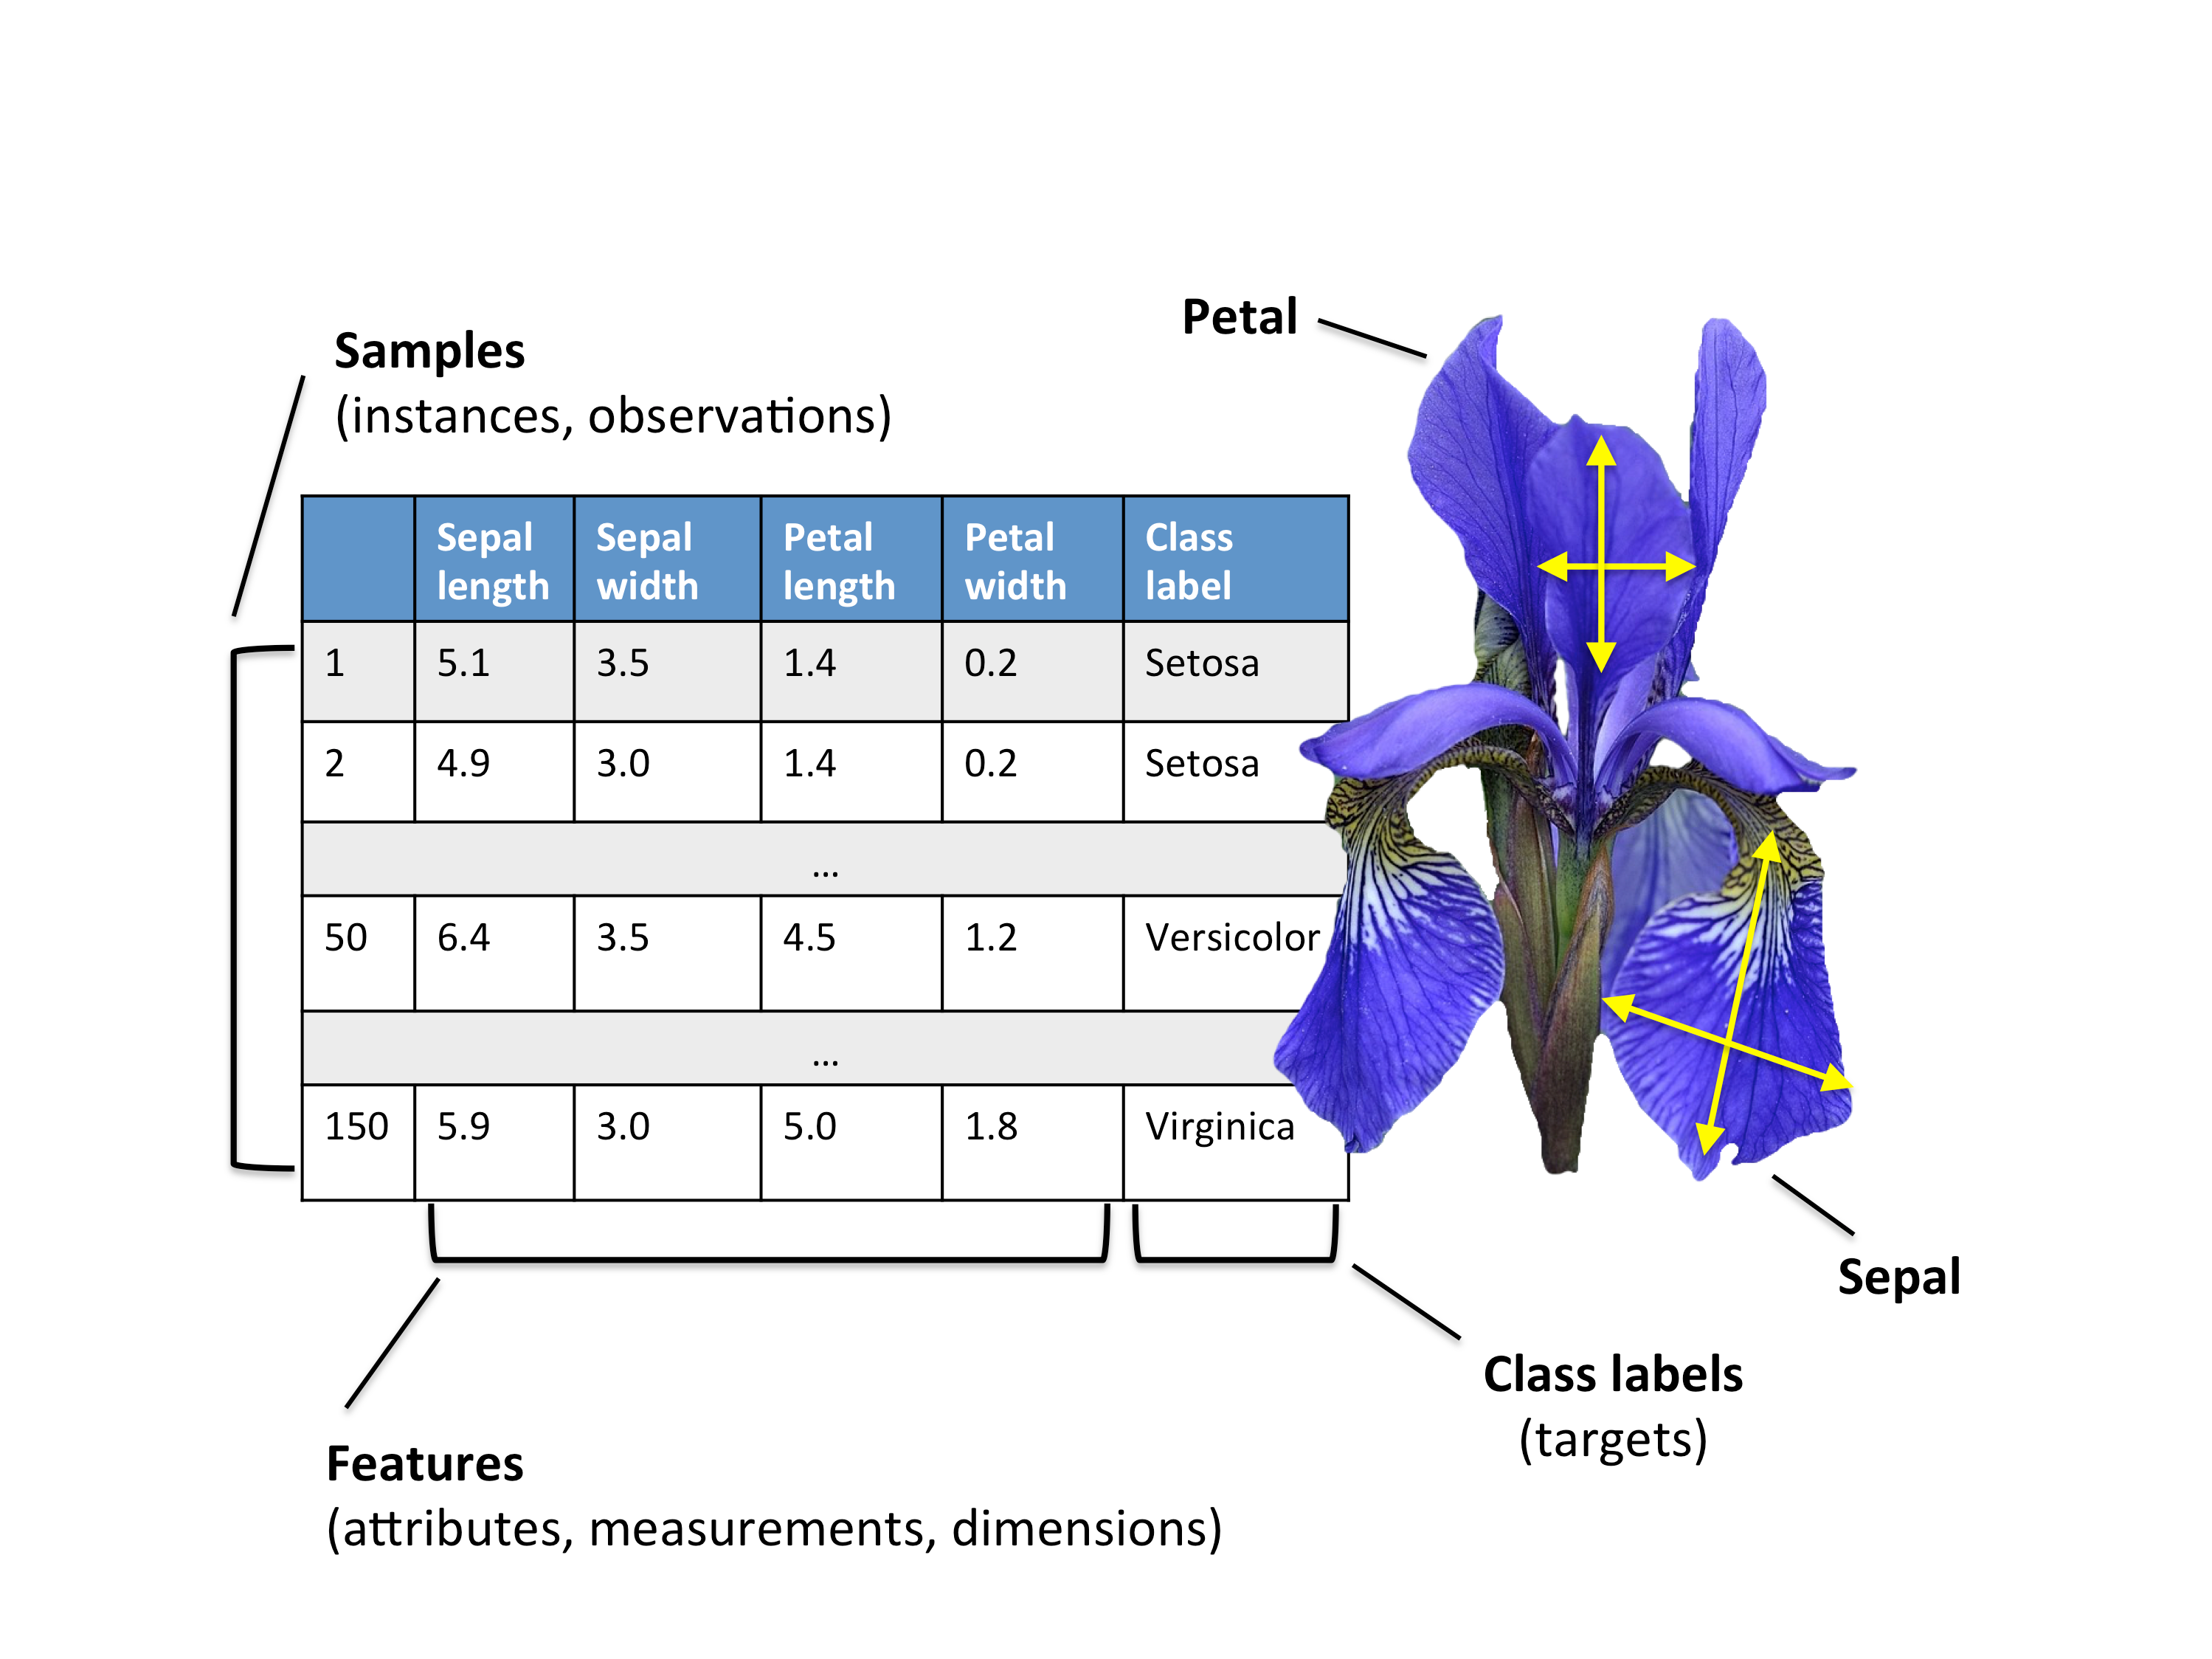

Credit: https://www.mghassany.com/courses/MLcourse/pw-6.html

Right away, you can see more confusion lurking: there are "features" and "targets" rather than "predictors" and "outcomes" or "independent variables" and "dependent variables". Where is $\beta$ and $X$? 

## Can we now visualize what is "linear" in this generalized linear model of sepal length and sepal width being used to predict species of iris flower?

> Please create python code that displays an altair visualization to very clearly show what is "linear" in this generalized linear model using the exact same data.

I understand that you're looking for a way to visualize what's linear in the logistic regression model using Altair. The linear part of the logistic regression model refers to the way the predictors (x1 and x2) are combined in the systematic component of the model. That is, they're combined in a linear way as a weighted sum: η = β0 + β1 * x1 + β2 * x2.

To visualize this, we can create a scatter plot of the iris data, color the points according to the species (y), and then overlay a line that represents the decision boundary of the logistic regression model, which is derived from the linear predictor η.

Here's some Python code that accomplishes this:

In [3]:
import altair as alt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Create the design matrix X and the target vector y
X = iris.data[:100, :2]
y = iris.target[:100]

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
df['species'] = y

# Fit the logistic regression model
model = LogisticRegression().fit(X, y)

# The model's coefficients correspond to β in your lecture note
β0 = model.intercept_[0]  # This is the intercept
β1, β2 = model.coef_[0]  # These are the coefficients for x1 and x2

# Generate data for the decision boundary (where η = 0)
x1 = np.linspace(df['sepal_length'].min(), df['sepal_length'].max(), 100)
x2 = -(β0 + β1 * x1) / β2 # this is the equation for the decision boundary: standard formula for plotting a line from high school: y = mx + b, where m is the slope and b is the intercept
boundary = pd.DataFrame({'sepal_length': x1, 'sepal_width': x2})

# Create the Altair chart
points = alt.Chart(df).mark_point().encode(
    x='sepal_length',
    y='sepal_width',
    color='species:N'
)

line = alt.Chart(boundary).mark_line(color='black').encode(
    x='sepal_length',
    y='sepal_width'
)

chart = points + line
chart


alt.LayerChart(...)

## Followup questions
* what is "decision boundary" and why is it at $\eta = 0$? 
* why would there even *be* a decision boundary -- that seems like creating an abritrary discrete boundary between a continuous set of variables (sepal length and sepal width) and a discrete set of variables (species of iris flower). how many human bioligists agree there are clear delineations between species, and can we measure this using genetics of the iris flower?
  * https://www.frontiersin.org/articles/10.3389/fmicb.2018.00770/full -- this seems like one method among many to create "artificial" boundaries between continuous variables and discrete variables, for the purposes of communication, classification, taking action and making decisions (e.g. to try to impact biodiversity by counting the number of "distinct" things in an area and getting humans to agree on it)

# Logistic Regression Perspective on Embeddings

> please describe the Logistic Regression Perspective on Embeddings with references.

In machine learning, embeddings are low-dimensional representations of high-dimensional data. They're often used to represent categorical variables in a way that preserves relevant information about the original categories. These representations are typically learned as part of a larger machine learning model.

**Logistic Regression Perspective on Embeddings**

When we represent a categorical variable with an embedding in a logistic regression model, we're essentially creating a new set of features for each category of the variable. Each of these features is a dimension in the embedding space, and the coefficients of these features are learned during the training of the logistic regression model.

To be more specific, consider a logistic regression model that uses a one-hot encoding to represent a categorical variable. In a one-hot encoding, each category of the variable is represented by a separate feature, which takes the value 1 for instances of that category and 0 for all others. This is equivalent to an embedding where each category is represented by a point on one of the axes in the embedding space.

Now, consider replacing the one-hot encoding with an embedding. Instead of representing each category with a point on one of the axes, we're now representing it with a point somewhere in the embedding space. This point is determined by the values of the embedding features for that category.

The coefficients of these features in the logistic regression model determine the decision boundary of the model in the embedding space. Therefore, the position of a category's point in this space relative to the decision boundary determines the model's output for instances of that category.

**References**

For more on the use of embeddings in machine learning, you can check out these references:

- *Neural Collaborative Filtering*. He, Xiangnan, et al. Proceedings of the 26th International Conference on World Wide Web. International World Wide Web Conferences Steering Committee, 2017. This paper introduces a collaborative filtering framework based on neural networks and discusses the use of embeddings to represent users and items in a recommendation system.

- *Entity Embeddings of Categorical Variables*. Guo, Cheng, and Felix Berkhahn. arXiv preprint arXiv:1604.06737 (2016). This paper presents a method for learning embeddings of categorical variables and demonstrates its effectiveness on a Kaggle competition dataset.

- *Word2Vec*. Mikolov, Tomas, et al. Efficient Estimation of Word Representations in Vector Space. arXiv preprint arXiv:1301.3781 (2013). This is the original Word2Vec paper, which introduced the concept of word embeddings.

It's important to note that while embeddings are used extensively in deep learning (for example, in the form of word embeddings for natural language processing), they can also be used in more traditional models like logistic regression. The benefit of using embeddings is that they can capture more complex relationships between categories than simpler encoding schemes like one-hot encoding.

> please create a markdown table with the key concepts here and corresponding mathematics in raw latex format.

Sure, here is a markdown table with the key concepts related to logistic regression and embeddings:

| Concept                 | Description                                                       | Mathematical Representation in LaTeX |
|-------------------------|-------------------------------------------------------------------|--------------------------------------|
| Logistic Regression     | A statistical model used for binary classification problems.       | $log(\frac{\mu}{1 - \mu}) = \beta_0 + \beta_1x_1 + \beta_2x_2$ |
| Systematic Component (η)| The part of the logistic regression model that combines the predictors linearly. | $\eta = X\beta = \beta_0 + \beta_1x_1 + \beta_2x_2$ |
| Logistic Function       | A function used to transform the linear predictor to a probability. | $g(\mu) = \log(\frac{\mu}{1 - \mu}) = \eta$ |
| Inverse Logistic Function | The function used to calculate the probability of the target variable being 1, given the predictors. | $\mu = \frac{1}{1 + \exp(-(\beta_0 + \beta_1x_1 + \beta_2x_2))}$ |
| Embedding               | A low-dimensional representation of high-dimensional data. Often used to represent categorical variables in a way that preserves relevant information. | N/A |
| One-hot encoding        | A method of representing categorical variables as binary vectors, where each category is represented by an element in the vector that is 1, and all other elements are 0. | N/A |

Please note that mathematical representations for embeddings and one-hot encoding are not provided as these concepts are more general data representation techniques rather than mathematical formulas. Their representation depends on the specific application and data at hand.

## Taking a prescriptive stance on embeddings: starting from the earliest "canonical" reference that helped lead to ChatGPT

*Word2Vec*. Mikolov, Tomas, et al. Efficient Estimation of Word Representations in Vector Space. arXiv preprint arXiv:1301.3781 (2013). This is the original Word2Vec paper, which introduced the concept of word embeddings.

> please keep the same notation we use for the prescriptive stance on generalized linear models and create a markdown table for the key concepts in the paper that you state introduced embeddings, *Word2Vec*. Mikolov, Tomas, et al. Efficient Estimation of Word Representations in Vector Space. arXiv preprint arXiv:1301.3781 (2013).

The Word2Vec paper introduces two key models for generating word embeddings, Continuous Bag of Words (CBOW) and Skip-gram. These models are used to generate word embeddings by training on a large corpus of text and learning to predict a word given its context (CBOW) or predict the context given a word (Skip-gram). The word embeddings are the learned parameters in these models.

To create the table, we'll use the following notations, keeping in line with the notations used for generalized linear models:

- `v`: word vector or embedding
- `w`: word
- `c`: context of a word
- `θ`: parameters to be estimated in the models

Here is the markdown table:

| Concept | Description | Mathematical Representation in LaTeX |
|---------|-------------|--------------------------------------|
| Word Embedding (`v`) | A numerical vector representation of a word that encapsulates its semantic meaning. | $v_w$ for a word `w` |
| Continuous Bag of Words (CBOW) | A model that predicts a target word `w` from its surrounding context `c`. | $P(w|c; \theta)$ |
| Skip-gram | A model that uses a word `w` to predict the words `c` in its context. | $P(c|w; \theta)$ |

In the table:

- `P(w|c; θ)` represents the probability of a word `w` given its context `c`, parameterized by `θ`.
- `P(c|w; θ)` represents the probability of a context `c` given a word `w`, parameterized by `θ`.

Please note that the mathematical expressions for CBOW and Skip-gram models are simplifications. The actual expressions involve more complex mathematical formulas and involve additional concepts such as negative sampling, which aren't covered here for simplicity.

In [4]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import altair as alt
import pandas as pd

# Load pre-trained word embeddings
model = api.load('word2vec-google-news-300')

# Select words to visualize
words = ['king', 'queen', 'man', 'woman', 'bread', 'butter', 'cat', 'dog']

# Get vectors for each word
vectors = [model[word] for word in words]

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Use only 400 vectors to compute the t-SNE embeddings
vectors_tsne = tsne.fit_transform(vectors)

# Create a dataframe for plotting
df = pd.DataFrame(vectors_tsne, columns=['x', 'y'])
df['word'] = words

# Create an altair chart
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip='word'
).properties(width=500, height=500)

text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='word'
)

(chart + text).interactive()


[==------------------------------------------------] 4.2% 70.7/1662.8MB downloaded

KeyboardInterrupt: 

## Looks like GPT-4 is hiting a wall here. Let's go back to the principles and visualize the key concepts, such as a word embedding for canonical data



# Linear Algebra Perspective on Embeddings

> please give the linear algebra perspective on embeddings.

Word embeddings, such as those created by models like Word2Vec, GloVe, or FastText, are essentially matrices that transform one-hot encoded vectors of words into a dense vector space. From a linear algebra perspective, word embeddings are learned transformation matrices.

In the most abstract sense, word embeddings are a linear transformation from one vector space (the space of one-hot encoded vectors) to another vector space (the space of the embeddings). This transformation is performed by a matrix (the embedding matrix), which is learned through optimization during the training process.

Each row in this matrix corresponds to the vector for one word in the vocabulary. Therefore, when you multiply a one-hot encoded vector (which is all zeroes except for a one at the index of your word) by the matrix, you effectively select the row of the matrix that corresponds to your word.

The learned transformation aims to have the property that the geometric relationships between vectors in the output space reflect the semantic relationships between the corresponding words. For example, similar words should be close to each other in this space, and the directions in this space may represent meaningful semantic dimensions (such as gender, verb tense, pluralization, etc.).

This is the linear algebra perspective on embeddings: the embeddings are a matrix that transforms one-hot encoded vectors into a dense, lower-dimensional, and hopefully semantically meaningful space. This matrix is learned by training a model on a large corpus of text and optimizing the embeddings to make the model's predictions match the actual usage of words in the corpus.

That said, not all properties of word embeddings can be understood purely from a linear algebra perspective. The specific geometric properties of the embedding space are a result of the optimization process and the model architecture, and understanding these properties often requires insights from machine learning, optimization, and linguistics.

## Still too complicated! Need to use subject matter expertise and remember a reference

> please create a markdown table with the mathematics and key concepts from this paper describing a linear algebra perspective on embeddings: "Neural Word Embedding
as Implicit Matrix Factorization", https://proceedings.neurips.cc/paper_files/paper/2014/file/feab05aa91085b7a8012516bc3533958-Paper.pdf

Absolutely, here is a markdown table summarizing the key concepts from the paper "Neural Word Embedding as Implicit Matrix Factorization" along with the corresponding mathematical notation:

| Concept   | Mathematical Notation (Latex) |
|:-------------|:-----------------|
| Co-occurrence Matrix | $X$ |
| Word Embedding Matrix | $W$ |
| Context Embedding Matrix | $C$ |
| Inner Product of Word and Context Embeddings | $W^T C$ |
| Global Word Frequencies | $b_w$ |
| Global Context Frequencies | $b_c$ |
| Loss Function | $L(X, W^TC + b_w + b_c) = \sum_{i,j} F(X_{ij}, (W^TC + b_w + b_c)_{ij})$ |
| Matrix Factorization | $W^TC$ approximates $X$ |
| Objective Function | Minimize $L(X, W^TC + b_w + b_c)$ over $W$, $C$, $b_w$, and $b_c$ |

This paper provides a novel perspective on word embeddings, viewing them as factorizations of word co-occurrence matrices. This view connects the methods of matrix factorization (a technique with a long history in information retrieval) to neural word embedding techniques like Word2Vec. It illustrates the connection between these two seemingly disparate methods and provides a unified perspective to understand and build upon them.

The mathematics here mainly deal with linear algebra (matrix multiplication, matrix factorization) and optimization (minimizing a loss function), demonstrating the fundamental role these disciplines play in the construction and understanding of word embeddings.

> please redo this markdown table with python code snippets demonstrating examples of each key concept and potentially a way to visualize each using the altair visualization library.

I'm afraid there might be a bit of confusion here. The concepts from the paper "Neural Word Embedding as Implicit Matrix Factorization" are theoretical and mathematical in nature, and don't map directly to standalone Python code snippets or visualizations.

For example, the Co-occurrence Matrix, Word Embedding Matrix, and Context Embedding Matrix are data structures used in the word embedding learning process, while the Inner Product of Word and Context Embeddings, Global Word Frequencies, Global Context Frequencies, Loss Function, Matrix Factorization, and Objective Function are components of the learning process itself.

Creating a comprehensive visualization or code demonstration of these concepts would essentially involve implementing the word embedding learning algorithm and training it on a corpus of text. This is a complex task that goes beyond simple code snippets and involves knowledge of linear algebra, optimization, and natural language processing.

Moreover, visualizing these concepts using Altair would be challenging due to the high-dimensional nature of the data. For example, word and context embeddings are vectors in a high-dimensional space, and visualizing high-dimensional spaces is a complex task in itself.

That being said, I can provide a simplified illustration of some of these concepts using Python and the Gensim library:

In [5]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

# Example corpus
corpus = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "cats and dogs are great",
    "sitting on the mat is nice",
    "sitting on the log is nice too",
]

# Tokenize the corpus
tokenized_corpus = [doc.split() for doc in corpus]

In [6]:
tokenized_corpus

[['the', 'cat', 'sat', 'on', 'the', 'mat'],
 ['the', 'dog', 'sat', 'on', 'the', 'log'],
 ['cats', 'and', 'dogs', 'are', 'great'],
 ['sitting', 'on', 'the', 'mat', 'is', 'nice'],
 ['sitting', 'on', 'the', 'log', 'is', 'nice', 'too']]

In [7]:
import altair as alt
import pandas as pd
import numpy as np

# Create the co-occurrence matrix
co_occurrence_matrix = np.array([[1, 2, 1, 0, 0],
                                 [2, 1, 1, 1, 0],
                                 [1, 1, 1, 2, 1],
                                 [0, 1, 2, 1, 2],
                                 [0, 0, 1, 2, 1]])

# Create a pandas DataFrame
df = pd.DataFrame(co_occurrence_matrix, columns=['Word1', 'Word2', 'Word3', 'Word4', 'Word5'])

# Melt the DataFrame into a format compatible with Altair
df = df.reset_index().melt('index')

# Create a heatmap
heatmap = alt.Chart(df).mark_rect().encode(
    x='index:O',
    y='variable:O',
    color='value:Q',
    tooltip=[
        alt.Tooltip('index:O', title='Word1'),
        alt.Tooltip('variable:O', title='Word2'),
        alt.Tooltip('value:Q', title='Frequency')
    ]
).properties(
    title='Co-occurrence Matrix',
    width=400,
    height=400
)

heatmap


alt.Chart(...)

# Plan for next lecture

* spend a LOT more time using subject matter expertise and prior knowledge to properly define and introduce co-occurence matrices from several perspectives (graph theory, machine learning, information retrieval, recommender systems)
* give example visualizations of co-occurence matrices using altair and data from class ideally
* after introducing co-occurrence matrices, then introduce the mathematics and key concepts from this paper: "Neural Word Embedding as Implicit Matrix Factorization", https://proceedings.neurips.cc/paper_files/paper/2014/file/feab05aa91085b7a8012516bc3533958-Paper.pdf

# Machine Learning Perspective on Embeddings

* deep learning